In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import library as lib
import seaborn as sns

In [2]:
df = lib.import_music_df_with_model()
df.head()

,Track,Artist,Placement,Year,Month,Day,danceability,energy,key,loudness,speechiness,acousticness,liveness,valence,tempo,Cluster
0,El Paso,Marty Robbins,1,1960,1,4,0.654,0.452,2.0,-9.709,0.0300,0.835,0.160,0.691,106.662,1
4,Why,Frankie Avalon,2,1960,1,4,0.510,0.349,5.0,-8.677,0.0264,0.762,0.130,0.586,94.267,1
7,The Big Hurt,Miss Toni Fisher,3,1960,1,4,0.624,0.557,0.0,-8.309,0.0299,0.783,0.173,0.676,123.919,0
14,Heartaches By The Number,Guy Mitchell,6,1960,1,4,0.584,0.589,5.0,-11.203,0.0718,0.463,0.069,0.842,172.484,2
16,It's Time To Cry,Paul Anka,7,1960,1,4,0.311,0.314,3.0,-12.810,0.0325,0.731,0.335,0.565,109.983,0


In [3]:
image_filepath = "../images/plots/top-songs"

In [4]:
attribute_df = df[['Placement','danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'liveness', 'valence', 'tempo', 'Cluster']]

In [5]:
top_20 = attribute_df[attribute_df['Placement'].between(1, 20)]
top_40 = attribute_df[attribute_df['Placement'].between(21, 40)]
top_60 = attribute_df[attribute_df['Placement'].between(41, 60)]
top_80 = attribute_df[attribute_df['Placement'].between(61, 80)]
top_100 = attribute_df[attribute_df['Placement'].between(81, 100)]

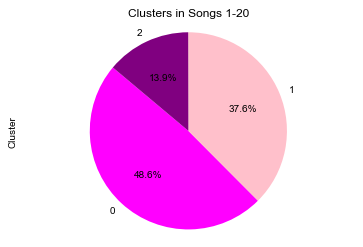

In [6]:
top_20.Cluster.groupby(top_20.Cluster).count().plot(kind='pie', title=("Clusters in Songs 1-20"), autopct="%1.1f%%", colors = ['magenta', 'pink', 'purple'], startangle=140)
plt.axis('equal')
plt.savefig(f"{image_filepath}/songs1-20.png")
sns.set_theme()
plt.show()

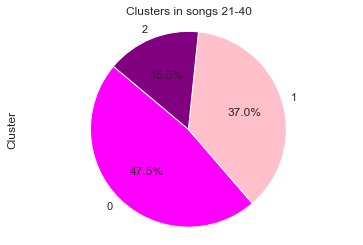

In [7]:
top_40.Cluster.groupby(top_40.Cluster).count().plot(kind='pie', title=("Clusters in songs 21-40"), autopct="%1.1f%%", colors = ['magenta', 'pink', 'purple'], startangle=140)
plt.axis('equal')
plt.savefig(f"{image_filepath}/songs21-40.png")
sns.set_theme()
plt.show()

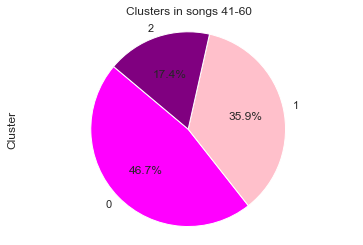

In [8]:
top_60.Cluster.groupby(top_60.Cluster).count().plot(kind='pie', title=("Clusters in songs 41-60"), autopct="%1.1f%%", colors = ['magenta', 'pink', 'purple'], startangle=140)
plt.axis('equal')
plt.savefig(f"{image_filepath}/songs41-60.png")
sns.set_theme()
plt.show()

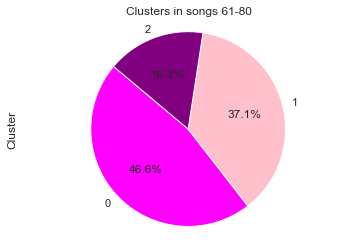

In [9]:
top_80.Cluster.groupby(top_80.Cluster).count().plot(kind='pie', title=("Clusters in songs 61-80"), autopct="%1.1f%%", colors = ['magenta', 'pink', 'purple'], startangle=140)
plt.axis('equal')
plt.savefig(f"{image_filepath}/songs61-80.png")
sns.set_theme()
plt.show()

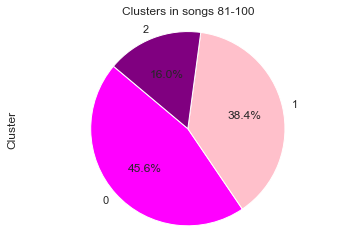

In [10]:
top_100.Cluster.groupby(top_100.Cluster).count().plot(kind='pie', title=("Clusters in songs 81-100"), autopct="%1.1f%%", colors = ['magenta', 'pink', 'purple'], startangle=140)
plt.axis('equal')
plt.savefig(f"{image_filepath}/songs81-100.png")
sns.set_theme()
plt.show()

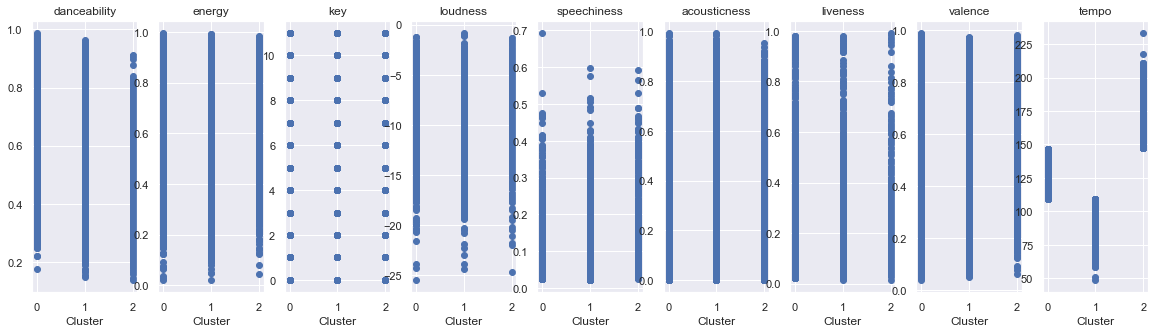

In [11]:
columns = list(top_20.columns)
columns.remove('Cluster')
columns.remove('Placement')

fig, ax = plt.subplots(1, len(columns), figsize = (20, 5))

for idx, col in enumerate(columns, 0):
    ax[idx].plot(top_20['Cluster'], top_20[col], 'o')
    ax[idx].set_xlabel('Cluster')
    ax[idx].set_title(col)

plt.savefig(f"{image_filepath}/scattersongs1-20.png")
plt.show()

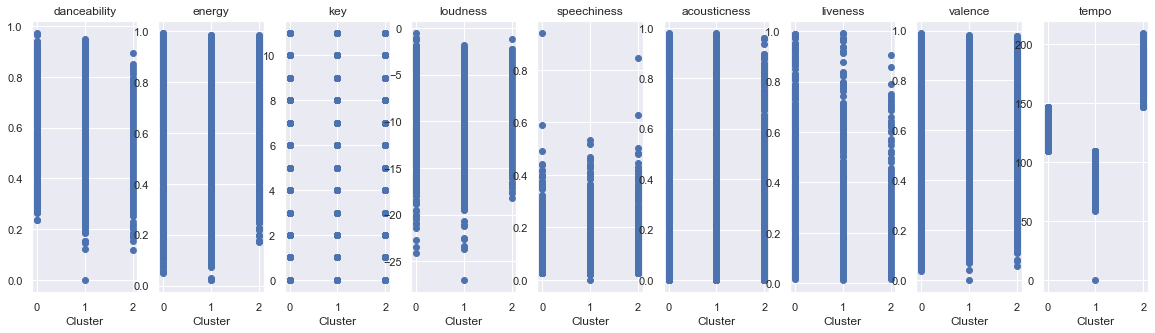

In [12]:
columns = list(top_40.columns)
columns.remove('Cluster')
columns.remove('Placement')


fig, ax = plt.subplots(1, len(columns), figsize = (20, 5))

for idx, col in enumerate(columns, 0):
    ax[idx].plot(top_40['Cluster'], top_40[col], 'o')
    ax[idx].set_xlabel('Cluster')
    ax[idx].set_title(col)

plt.savefig(f"{image_filepath}/scattersongs21-40.png")
plt.show()

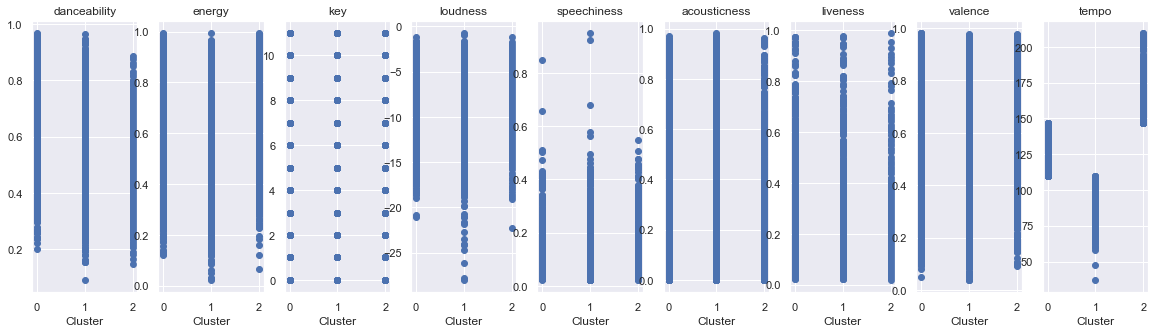

In [13]:
columns = list(top_60.columns)
columns.remove('Cluster')
columns.remove('Placement')


fig, ax = plt.subplots(1, len(columns), figsize = (20, 5))

for idx, col in enumerate(columns, 0):
    ax[idx].plot(top_60['Cluster'], top_60[col], 'o')
    ax[idx].set_xlabel('Cluster')
    ax[idx].set_title(col)
    
plt.savefig(f"{image_filepath}/scattersongs41-60.png")
plt.show()

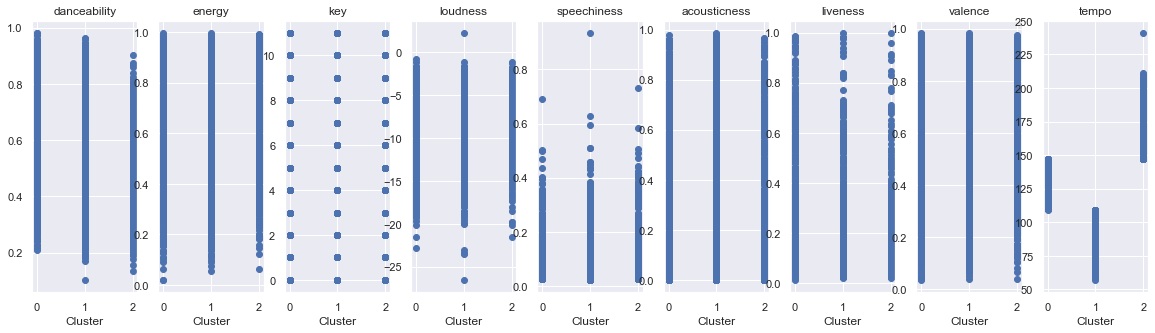

In [14]:
columns = list(top_80.columns)
columns.remove('Cluster')
columns.remove('Placement')


fig, ax = plt.subplots(1, len(columns), figsize = (20, 5))

for idx, col in enumerate(columns, 0):
    ax[idx].plot(top_80['Cluster'], top_80[col], 'o')
    ax[idx].set_xlabel('Cluster')
    ax[idx].set_title(col)

plt.savefig(f"{image_filepath}/scattersongs61-80.png")
plt.show()

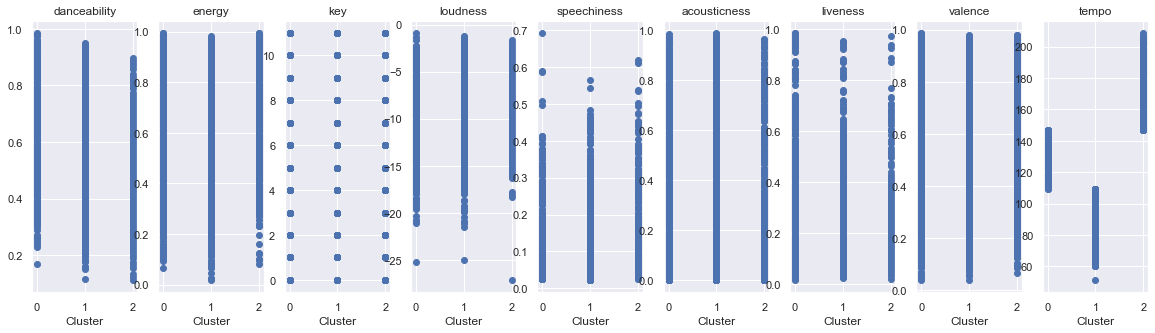

In [15]:
columns = list(top_100.columns)
columns.remove('Cluster')
columns.remove('Placement')


fig, ax = plt.subplots(1, len(columns), figsize = (20, 5))

for idx, col in enumerate(columns, 0):
    ax[idx].plot(top_100['Cluster'], top_100[col], 'o')
    ax[idx].set_xlabel('Cluster')
    ax[idx].set_title(col)
    
plt.savefig(f"{image_filepath}/scattersongs81-100.png")
plt.show()

# Aaron's Graphs

In [16]:
def get_rank(row):
    placement = row["Placement"]
    if placement < 20:
        return "Top 20"
    elif placement < 40:
        return "Top 40"
    elif placement < 60:
        return "Top 60"
    elif placement < 80:
        return "Top 80"
    else:
        return "Top 100"
attribute_df["Rank"] = attribute_df.apply(get_rank, axis = 1)
attribute_df.head()

C:\Users\wollm\anaconda3\envs\PythonML\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,Placement,danceability,energy,key,loudness,speechiness,acousticness,liveness,valence,tempo,Cluster,Rank
0,1,0.654,0.452,2.0,-9.709,0.0300,0.835,0.160,0.691,106.662,1,Top 20
4,2,0.510,0.349,5.0,-8.677,0.0264,0.762,0.130,0.586,94.267,1,Top 20
7,3,0.624,0.557,0.0,-8.309,0.0299,0.783,0.173,0.676,123.919,0,Top 20
14,6,0.584,0.589,5.0,-11.203,0.0718,0.463,0.069,0.842,172.484,2,Top 20
16,7,0.311,0.314,3.0,-12.810,0.0325,0.731,0.335,0.565,109.983,0,Top 20


In [17]:
rank_gb = attribute_df.groupby(["Rank", "Cluster"])
count_df = rank_gb.count()
count_df = count_df.reindex(["Top 20", "Top 40", "Top 60", "Top 80", "Top 100"], level="Rank")
count_df

Placement  danceability  energy   key  loudness  speechiness  \
Rank    Cluster                                                                 
Top 20  0             2769          2769    2769  2769      2769         2769   
        1             2144          2144    2144  2144      2144         2144   
        2              788           788     788   788       788          788   
Top 40  0             1790          1790    1790  1790      1790         1790   
        1             1397          1397    1397  1397      1397         1397   
        2              582           582     582   582       582          582   
Top 60  0             1726          1726    1726  1726      1726         1726   
        1             1315          1315    1315  1315      1315         1315   
        2              646           646     646   646       646          646   
Top 80  0             1610          1610    1610  1610      1610         1610   
        1             1297          1297    1297  1297      1297         1297   
        2              560           560     560   560       560          560   
Top 100 0             1563          1563    1563  1563      1563         1563   
        1             1299          1299    1299  1299      1299         1299   
        2              549           549     549   549       549          549   

                 acousticness  liveness  valence  tempo  
Rank    Cluster                                          
Top 20  0                2769      2769     2769   2769  
        1                2144      2144     2144   2144  
        2                 788       788      788    788  
Top 40  0                1790      1790     1790   1790  
        1                1397      1397     1397   1397  
        2                 582       582      582    582  
Top 60  0                1726      1726     1726   1726  
        1                1315      1315     1315   1315  
        2                 646       646      646    646  
Top 80  0                1610      1610     1610   1610  
        1                1297      1297     1297   1297  
        2                 560       560      560    560  
Top 100 0                1563      1563     1563   1563  
        1                1299      1299     1299   1299  
        2                 549       549      549    549

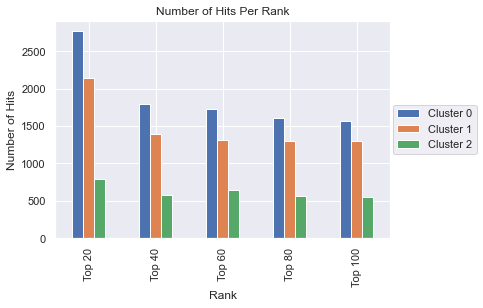

In [18]:
axis = count_df[["energy"]].unstack('Cluster').plot(kind="bar", title = "Number of Hits Per Rank")
axis.set_ylabel("Number of Hits")
axis.legend(["Cluster 0", "Cluster 1", "Cluster 2"], loc='center right', bbox_to_anchor=(1.275, .5))
plt.savefig(f"{image_filepath}/hits-per-rank.png", bbox_inches='tight')
plt.show()

In [19]:
mean_df = rank_gb.median()
mean_df = mean_df.reindex(["Top 20", "Top 40", "Top 60", "Top 80", "Top 100"], level="Rank")
mean_df

Placement  danceability  energy  key  loudness  speechiness  \
Rank    Cluster                                                                
Top 20  0                8        0.6520  0.6550  5.0   -8.2760      0.03870   
        1                8        0.6310  0.5795  5.0   -8.6420      0.04030   
        2                9        0.5170  0.6750  5.0   -7.8065      0.04690   
Top 40  0               29        0.6250  0.6570  5.0   -8.3420      0.03850   
        1               29        0.6110  0.6050  6.0   -8.3470      0.03760   
        2               30        0.4990  0.6805  5.0   -7.3545      0.04680   
Top 60  0               49        0.6290  0.6680  5.5   -8.3470      0.03950   
        1               50        0.6070  0.5990  5.0   -8.4910      0.03850   
        2               50        0.4925  0.6790  5.0   -7.2265      0.04790   
Top 80  0               69        0.6350  0.6710  5.0   -8.2020      0.04110   
        1               70        0.6120  0.5990  5.0   -8.4350      0.03980   
        2               69        0.4885  0.6970  5.0   -7.5550      0.05085   
Top 100 0               90        0.6340  0.6630  6.0   -8.5190      0.04100   
        1               90        0.6010  0.5980  5.0   -8.6370      0.03850   
        2               90        0.4980  0.6770  5.0   -7.0890      0.05610   

                 acousticness  liveness  valence     tempo  
Rank    Cluster                                             
Top 20  0              0.1700    0.1260   0.6970  125.0310  
        1              0.2260    0.1240   0.5975   95.1290  
        2              0.1980    0.1305   0.6400  166.4105  
Top 40  0              0.1605    0.1355   0.6620  125.2085  
        1              0.2430    0.1280   0.5960   95.0920  
        2              0.1575    0.1450   0.6615  166.9225  
Top 60  0              0.1350    0.1340   0.6765  125.8455  
        1              0.2160    0.1290   0.5820   94.7980  
        2              0.1675    0.1395   0.5980  165.7335  
Top 80  0              0.1315    0.1310   0.6665  125.7340  
        1              0.2210    0.1280   0.5990   94.8360  
        2              0.1565    0.1425   0.6060  165.8630  
Top 100 0              0.1550    0.1280   0.6670  125.1410  
        1              0.2620    0.1350   0.5760   94.0000  
        2              0.1660    0.1360   0.5930  166.1220

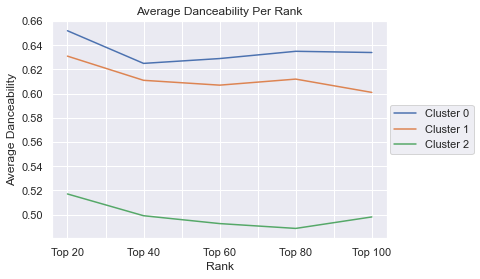

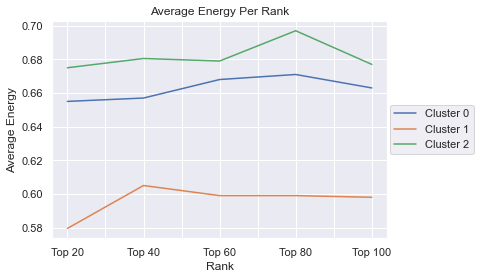

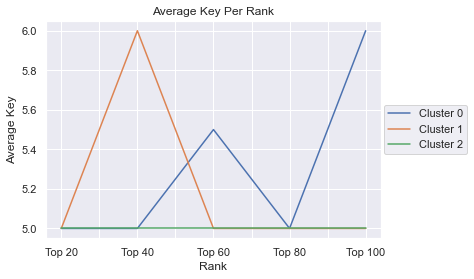

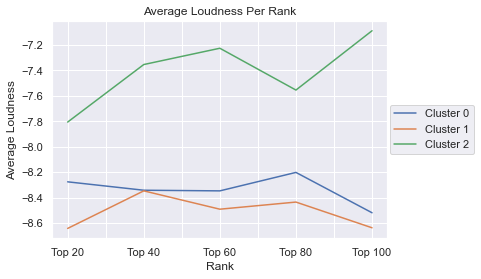

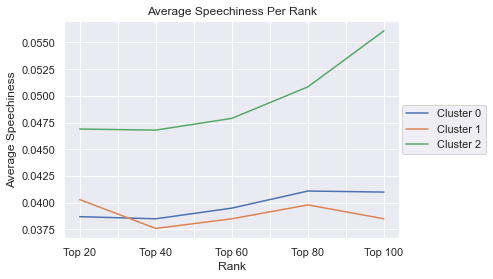

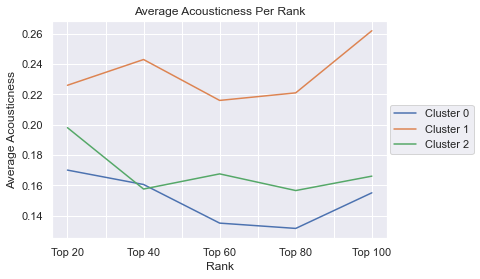

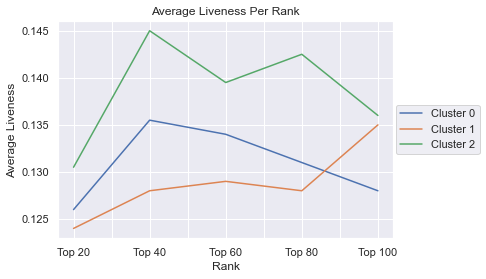

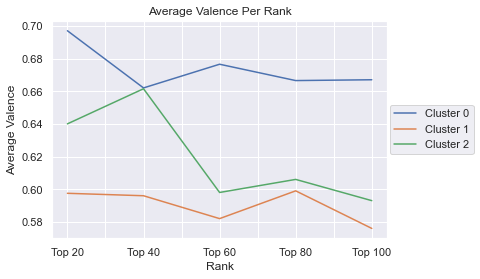

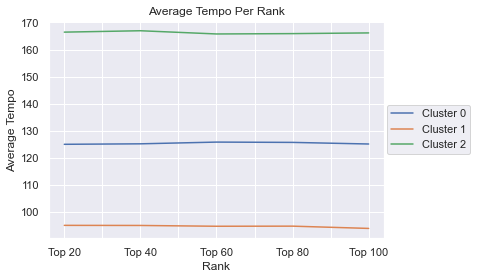

In [20]:
columns = [
    "danceability",
    "energy",
    "key",
    "loudness",
    "speechiness",
    "acousticness",
    "liveness",
    "valence",
    "tempo"
]
for column in columns:
    axis = mean_df[[column]].unstack('Cluster').plot(kind="line", title = f"Average {column.capitalize()} Per Rank")
    axis.set_ylabel(f"Average {column.capitalize()}")
    axis.legend(["Cluster 0", "Cluster 1", "Cluster 2"], loc='center right', bbox_to_anchor=(1.275, .5))
    plt.savefig(f"{image_filepath}/{column.lower()}.png", bbox_inches='tight')
    plt.show()